## Notebook for playing around with acoular package

In [31]:
from os import path
import acoular
from pylab import figure, plot, axis, imshow, colorbar, show

In [32]:
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
datafile = 'three_sources.h5'

[('three_sources_cache.h5', 15)]


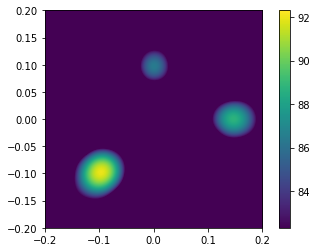

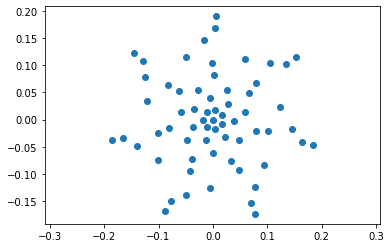

In [33]:
mg = acoular.MicGeom( from_file=micgeofile )
ts = acoular.TimeSamples( name='three_sources.h5' )
ps = acoular.PowerSpectra( time_data=ts, block_size=128, window='Hanning' )
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01 )
st = acoular.SteeringVector( grid = rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
pm = bb.synthetic( 8000, 3 )
Lm = acoular.L_p( pm )
imshow( Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), \
interpolation='bicubic')
colorbar()
figure(2)
plot(mg.mpos[0],mg.mpos[1],'o')
axis('equal')
show()